In [5]:
#Import Libraries
import numpy as np
from nltk import sent_tokenize, word_tokenize
import nltk
import pandas as pd
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk.corpus import sentiwordnet as swn
import re
from textblob import TextBlob
import keras
import pandas as pd
from sklearn import preprocessing
from functools import reduce
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
data1 = pd.read_csv('Combined_Hotel_Summary.csv')

In [21]:
hotel = data1.loc[data1['Composite_rating'] >=8.0]
facilities = hotel['common_surrounding_hotels_features']

In [35]:
facilities.dropna

<bound method Series.dropna of 1146    ['Free WiFi Internet Access Included', 'Non Sm...
1147    ['Free WiFi Internet Access Included', 'Non Sm...
1148    ['Free WiFi Internet Access Included', 'Family...
1152    ['Parking (fee required)', 'Free WiFi Internet...
1153    ['Parking (fee required)', 'Free WiFi Internet...
                              ...                        
2376    ['Parking (fee required)', 'Free WiFi Internet...
2377    ['Free WiFi Internet Access Included', 'Swimmi...
2378    ['Free WiFi Internet Access Included', 'Non Sm...
2379    ['Parking (fee required)', 'Free WiFi Internet...
2380    ['Parking (fee required)', 'Free WiFi Internet...
Name: common_surrounding_hotels_features, Length: 755, dtype: object>

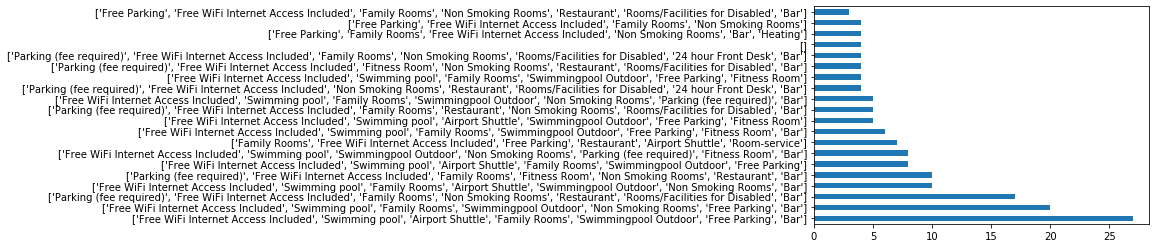

In [42]:
facilities.value_counts()[:20].plot(kind='barh')
plt.savefig('Best_Hotel_Features.png')

In [3]:
from matplotlib_venn import venn3

In [6]:
d1 = pd.read_csv('all_hotel_attrs_bookingcom.csv')
d2 = pd.read_csv('all_hotel_attrs_tripadvisor.csv')
d3 = pd.read_csv('Hotels_com.csv',encoding='latin1')
d4 = pd.read_csv('Hotelscombined_com.csv',encoding='latin1')

In [56]:
d1n = set(d1['hotel_name'].unique())
d2n = set(d2['hotel_name'].unique())
d3n = set(d3['Hotel_name'].unique())
d4n = set(d4['Hotel_name'].unique())

5861

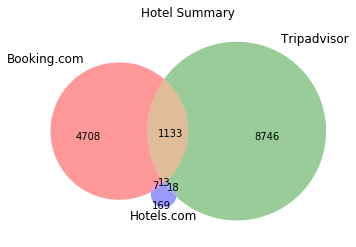

In [37]:
venn3([d1n, d2n, d3n], ('Booking.com', 'Tripadvisor', 'Hotels.com'))
plt.title("Hotel Summary")
plt.savefig('1.png')
plt.show()

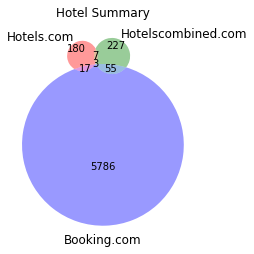

In [38]:
venn3([d3n, d4n, d1n], ('Hotels.com', 'Hotelscombined.com', 'Booking.com'))
plt.title("Hotel Summary")
plt.savefig('2.png')
plt.show()

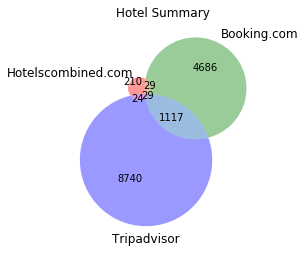

In [39]:
venn3([d4n, d1n, d2n], ('Hotelscombined.com', 'Booking.com', 'Tripadvisor'))
plt.title("Hotel Summary")
plt.savefig('3.png')
plt.show()

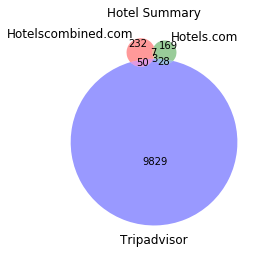

In [40]:
venn3([d4n, d3n, d2n], ('Hotelscombined.com', 'Hotels.com', 'Tripadvisor'))
plt.title("Hotel Summary")
plt.savefig('4.png')
plt.show()

In [9]:
g1 = d1['hotel_name'].unique()
g1 = pd.DataFrame(g1)
g2 = d2['hotel_name'].unique()
g3 = d3['Hotel_name'].unique()
g4 = d4['Hotel_name'].unique()
g2 = pd.DataFrame(g2)
g3 = pd.DataFrame(g3)
g4 = pd.DataFrame(g4)
print(len(g1+g2+g3+g4))

9910


In [65]:
ot = pd.merge(g1,g2,how='inner')
th = pd.merge(g2,g3,how='inner')
hf = pd.merge(g3,g4,how='inner')
fo = pd.merge(g4,g1,how='inner')
oh = pd.merge(g3,g1,how='inner')
tf = pd.merge(g4,g2,how='inner')
oth = pd.merge(ot,g3,how='inner')
thf = pd.merge(th,g4,how='inner')
hfo = pd.merge(hf,g1,how='inner')
fot = pd.merge(fo,g2,how='inner')
com = pd.merge(oth,g4,how='inner')

In [66]:
ot.columns = ['Booking.com x Tripadvisor']
th.columns = ['Tripadvisor x Hotels.com']
hf.columns = ['Hotels.com x Hotelscombined.com']
fo.columns = ['Hotelscombined.com x Booking.com']
oh.columns = ['Hotels.com x Booking.com']
tf.columns = ['Hotelscombined.com x Tripadvisor']
oth.columns = ['Booking.com x Tripadvisor x Hotels.com']
thf.columns = ['Tripadvisor x Hotels.com x Hotelscombined.com']
hfo.columns = ['Hotels.com x Hotelscombined.com x Booking.com']
fot.columns = ['Hotelscombined.com x Booking.com x Tripadvisor']
com.columns = ['Common Hotels']

In [69]:
len(com)

3

In [12]:
tot = g1.append(g2)
len(tot)

15771

In [84]:
t = len(tot)
t1 = len(g1)
t2 = len(g2)
t3 = len(g3)
t4 = len(g4)

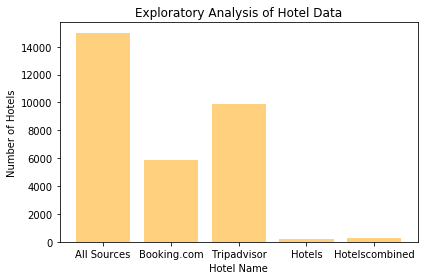

In [95]:
label = ['All Sources', 'Booking.com','Tripadvisor','Hotels','Hotelscombined']
var = [t,t1,t2,t3,t4]
plt.bar(label, var, align='center', alpha=0.5, color="orange")
plt.xlabel('Hotel Name')
plt.ylabel('Number of Hotels')
plt.title('Exploratory Analysis of Hotel Data')
plt.savefig('EAOHD.png')
plt.tight_layout()
plt.show()

In [96]:
tot = pd.DataFrame(tot)
tot.columns = ['All Hotels']
g1.columns = ['Booking.com']
g2.columns = ['Tripadvisor']
g3.columns = ['Hotels.com']
g4.columns = ['Hotelscombined.com']
result = pd.concat([g1,g2,g3,g4,tot,ot, th,hf,fo,oh,tf,oth,thf,hfo,fot,com], axis=1, sort=False)
result.to_csv('Hotels_across_all_sources.csv')